In [1]:
from preprocessing import *
from clustering import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from GMM import my_GMM_uniform_cluster
data_contrats = pd.read_csv('train_contrats_approx.csv',sep=",")

### Hierarchical clustering

In [4]:
t=time.time()
train_data,test_data = preprocessing(data_contrats, balance=True, train_size=0.75)
train_data,centroids,mean_frequencies,std_frequencies,clusters = train_clustering(train_data,threshold=7.2)
test_data = predict_clustering(test_data,centroids,clusters)
stab=stabilite(train_data,test_data,mean_frequencies,std_frequencies,clusters)
elapsed = time.time()-t
print("time elapsed : {} s".format(elapsed))

time elapsed : 4.130580902099609 s


In [5]:
stab_1=pd.DataFrame(stab,columns=['mean_sinistre_train',"mean_sinistre_train_test","std","diff"])
stab_1

,mean_sinistre_train,mean_sinistre_train_test,std,diff
0,0.009238,0.009119,0.018669,0.000119
1,0.007435,0.007080,0.018103,0.000355
2,0.009029,0.009125,0.019596,0.000096
3,0.004592,0.004994,0.011627,0.000402
4,0.007174,0.007007,0.015669,0.000167


### GMM clustering

In [6]:
train_data,test_data = preprocessing(data_contrats, balance=False, train_size=0.75)
t= time.time()
estimator = GaussianMixture(n_components=5,
              covariance_type='full', max_iter=500, random_state=0)
GMM_full_labels=estimator.fit_predict(train_data.drop(["Freq_sinistre"],axis=1))
elapsed = time.time()-t
print("time elapsed : {} s".format(elapsed))

/home/hrami/Documents/Mazars/Projet_Option_Mazars/preprocessing.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_clustering["Classe_Age_Situ_Cont"]=data_clustering["Classe_Age_Situ_Cont"].apply(classe_age)
/home/hrami/Documents/Mazars/Projet_Option_Mazars/preprocessing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_clustering["franchise"]=data_clustering["franchise"].apply(franchise_)
/home/hrami/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a cop

time elapsed : 3.9553704261779785 s


In [36]:
train_data["clusters"]=GMM_full_labels
test_data['clusters']=estimator.predict(test_data.drop(["Freq_sinistre"],axis=1))
all_data = pd.concat([train_data,test_data],ignore_index=True)

In [37]:
stab_2=pd.concat([train_data.groupby('clusters').mean()[["Freq_sinistre"]],all_data.groupby('clusters').mean()[["Freq_sinistre"]]],axis=1)
stab_2.columns=["mean_sinistre_train","mean_sinistre_train_test"]
stab_2["diff"]=np.abs(stab_2["mean_sinistre_train"]-stab_2["mean_sinistre_train_test"])
stab_2

,mean_sinistre_train,mean_sinistre_train_test,diff
clusters,,,
0,0.001623,0.001656,0.000033
1,0.001414,0.001443,0.000030
2,0.001421,0.001432,0.000011
3,0.001022,0.001287,0.000265
4,0.001646,0.001747,0.000101


### KMeans

In [40]:
train_data,test_data = preprocessing(data_contrats, balance=False, train_size=0.75)
t= time.time()
kmeans = KMeans(n_clusters=5, random_state=0).fit(train_data.drop(["Freq_sinistre"],axis=1))
train_labels=kmeans.labels_
test_labels=kmeans.predict(test_data.drop(["Freq_sinistre"],axis=1))
elapsed = time.time()-t
print("time elapsed : {} s".format(elapsed))

/home/hrami/Documents/Mazars/Projet_Option_Mazars/preprocessing.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_clustering["Classe_Age_Situ_Cont"]=data_clustering["Classe_Age_Situ_Cont"].apply(classe_age)
/home/hrami/Documents/Mazars/Projet_Option_Mazars/preprocessing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_clustering["franchise"]=data_clustering["franchise"].apply(franchise_)
/home/hrami/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a cop

time elapsed : 2.352850914001465 s


In [41]:
train_data["clusters"]=train_labels
test_data['clusters']=test_labels
all_data = pd.concat([train_data,test_data],ignore_index=True)

In [42]:
stab_3=pd.concat([train_data.groupby('clusters').mean()[["Freq_sinistre"]],all_data.groupby('clusters').mean()[["Freq_sinistre"]]],axis=1)
stab_3.columns=["mean_sinistre_train","mean_sinistre_train_test"]
stab_3["diff"]=np.abs(stab_3["mean_sinistre_train"]-stab_3["mean_sinistre_train_test"])
stab_3

,mean_sinistre_train,mean_sinistre_train_test,diff
clusters,,,
0,0.001636,0.001658,0.000022
1,0.001574,0.001612,0.000038
2,0.001727,0.001751,0.000025
3,0.001200,0.001203,0.000003
4,0.001721,0.001727,0.000005


In [44]:
print("mean diff with hierarchical clustering : {}".format(stab_1["diff"].mean()))
print("mean diff with GMM clustering : {}".format(stab_2["diff"].mean()))
print("mean diff with Kmeans clustering : {}".format(stab_3["diff"].mean()))

mean diff with hierarchical clustering : 0.0002671629813762611
mean diff with GMM clustering : 8.7964590524745e-05
mean diff with Kmeans clustering : 1.8585773869422752e-05


### Heatmap correlations

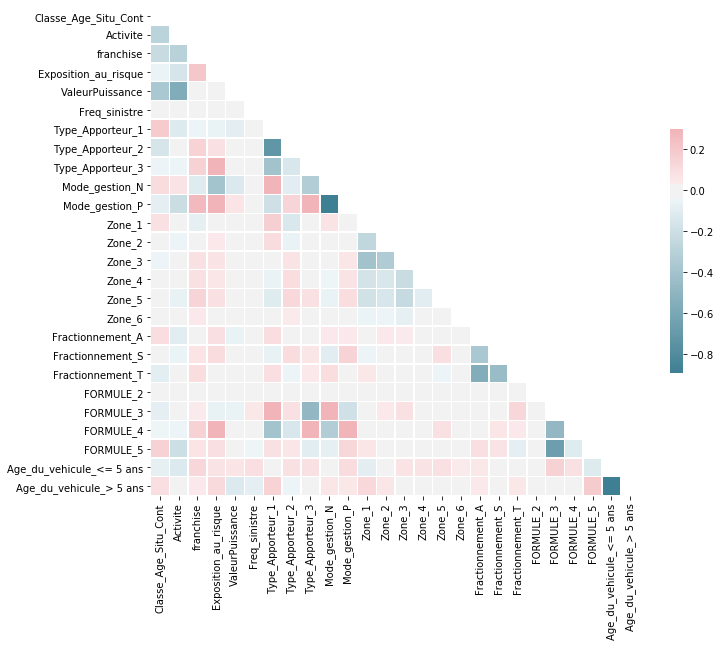

In [41]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### My_GMM